In [64]:
# !git clone https://github.com/Lareton/transport_network_optimization.git
# !pip install tqdm
# !pip install scanf

# !echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
# !apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
# !apt-get update
# !apt-get install python3-graph-tool #python3-matplotlib python3-cair

# !git clone https://github.com/niquepolice/bigchallenges.git

In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from tqdm import tqdm

from transport_network_optimization.transport_problem import DualOracle, OptimParams
from transport_network_optimization.acrcd import ACRCDOracleStacker, ACRCD_star
import numpy as np

from transport_network_optimization.transport_problem import HyperParams, OptimParams
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
from transport_network_optimization.read_data import get_network_df, get_corrs, get_full_df
from numba.core import types
import numba

from numba import njit
from graph_tool.topology import shortest_distance
import pandas as pd
import networkx as nx
import graph_tool as gt
from graph_tool.topology import shortest_distance
import numpy as np
import typing

import numba
from numba.core import types

In [67]:
net_df = get_network_df(Path('/content/transport_network_optimization/SiouxFalls') / 'SiouxFalls_net.tntp')
corrs = get_corrs(Path('/content/transport_network_optimization/SiouxFalls') / 'SiouxFalls_trips.tntp')
corrs = corrs / corrs.sum()

graph = gt.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])
graph.ep.capacity.a = graph.ep.capacity.a / corrs.sum()

In [71]:
l = np.sum(corrs, axis=1)
w = np.sum(corrs, axis=0)

zones_num = len(l)
sources = np.arange(zones_num)
targets = np.arange(zones_num)

params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)


In [69]:
def test_transport_problem(graph, net_df, l, w, params, sources, targets):
    dual_oracle = DualOracle(
        graph, net_df, l, w, params
    )
    oracle_stacker = ACRCDOracleStacker(
        dual_oracle,
        graph,
        sources,
        targets
    )
    return ACRCD_star(oracle_stacker, *oracle_stacker.get_init_vars_block(), 100)

In [70]:
history, la_mu_grad_norms, t_grad_norms, x1_list, x2_list, *l_ = test_transport_problem(graph, net_df, l, w, params, sources, targets)

1


  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
dual_value 54.13746196132573
la grad  0.2970060945743204
mu grad 0.16041110063971112



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135233193185962
grad dF dmu:  0.113332254958472
dual_value 54.137569831690655
grad dF dla:  0.11352329392130611
grad dF dmu:  0.11333223002748087
dual_value 54.13749784484288



  7%|▋         | 7/100 [00:00<00:01, 61.76it/s]

grad dF dla:  0.11352328122268977
grad dF dmu:  0.11333221756201424
dual_value 54.13747539017727
grad dF dla:  0.11352327487338876
grad dF dmu:  0.11333221132928815
dual_value 54.13746754752591
grad dF dla:  0.11352327169874005
grad dF dmu:  0.11333220821292689
dual_value 54.137464472369565
grad dF dla:  0.11352327011141615
grad dF dmu:  0.11333220665474675
dual_value 54.1374631463336
grad dF dla:  0.11352326931775432
grad dF dmu:  0.1133322058756568
dual_value 54.137462536201156
grad dF dla:  0.11352326892092342
grad dF dmu:  0.11333220548611181
dual_value 54.13746224435632
grad dF dla:  0.11352326872250797
grad dF dmu:  0.11333220529133936
dual_value 54.13746210173924
grad dF dla:  0.11352326862330026
grad dF dmu:  0.11333220519395312
dual_value 54.13746203125704
grad dF dla:  0.11352326857369642
grad dF dmu:  0.11333220514525999
dual_value 54.13746199622252
grad dF dla:  0.11352326854889447
grad dF dmu:  0.11333220512091342
dual_value 54.13746197875691
grad dF dla:  0.11352326853649

  1%|          | 1/100 [00:00<00:28,  3.50it/s]

dual_value 54.13746196568029
grad dF dla:  0.11352326852616028
grad dF dmu:  0.11333220509859666
dual_value 54.13746196277764
la grad  0.3005240846318894
mu grad 0.1604111006426085



  1%|          | 1/100 [00:00<00:03, 28.34it/s]


grad dF dla:  0.11352326853873342
grad dF dmu:  0.11333220511115628
dual_value 54.13746197160333
grad dF dla:  0.11352326853244685
grad dF dmu:  0.11333220510487647
dual_value 54.137461967189374
grad dF dla:  0.11352326852827141
grad dF dmu:  0.11333220510072337
dual_value 54.13746196425826
la grad  0.30052408465832514
mu grad 0.1604111006456051



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326854084453
grad dF dmu:  0.113332205113283
dual_value 54.137461973085436


  3%|▎         | 3/100 [00:00<00:12,  7.98it/s]

grad dF dla:  0.11352326853455798
grad dF dmu:  0.11333220510700319
dual_value 54.137461968670735
grad dF dla:  0.11352326853037426
grad dF dmu:  0.11333220510283111
dual_value 54.13746196573372
la grad  0.30052408468461567
mu grad 0.16041110064858244



  1%|          | 1/100 [00:00<00:03, 27.10it/s]


grad dF dla:  0.11352326854294738
grad dF dmu:  0.11333220511539076
dual_value 54.137461974562385
grad dF dla:  0.11352326853666082
grad dF dmu:  0.11333220510911093
dual_value 54.137461970146944
grad dF dla:  0.11352326853247457
grad dF dmu:  0.11333220510493275
dual_value 54.137461967207784
la grad  0.30052408471086073
mu grad 0.16041110065155365



  5%|▌         | 5/100 [00:00<00:09,  9.85it/s]

grad dF dla:  0.11352326854504771
grad dF dmu:  0.1133322051174924
dual_value 54.13746197603794
grad dF dla:  0.11352326853876113
grad dF dmu:  0.11333220511121257
dual_value 54.137461971621754
grad dF dla:  0.11352326853457403
grad dF dmu:  0.11333220510703197
dual_value 54.137461968681535
la grad  0.30052408473708864
mu grad 0.16041110065452258



  1%|          | 1/100 [00:00<00:02, 33.51it/s]

grad dF dla:  0.11352326854714716
grad dF dmu:  0.11333220511959159
dual_value 54.13746197751316
grad dF dla:  0.11352326854086059
grad dF dmu:  0.11333220511331178
dual_value 54.137461973096244
grad dF dla:  0.11352326853667319
grad dF dmu:  0.11333220510913017


dual_value 54.13746197015538
la grad  0.3005240847633101
mu grad 0.16041110065749056



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326854924631
grad dF dmu:  0.1133322051216898
dual_value 54.137461978988476
grad dF dla:  0.11352326854295974
grad dF dmu:  0.11333220511540996
dual_value 

  7%|▋         | 7/100 [00:00<00:08, 10.63it/s]

54.13746197457082
grad dF dla:  0.11352326853877236
grad dF dmu:  0.11333220511122793
dual_value 54.13746197162947
la grad  0.3005240847895299
mu grad 0.16041110066045822



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135232685513455
grad dF dmu:  0.11333220512378755
dual_value 54.13746198046406


  1%|          | 1/100 [00:00<00:04, 23.26it/s]

grad dF dla:  0.11352326854505891
grad dF dmu:  0.11333220511750776
dual_value 54.13746197604566


grad dF dla:  0.11352326854087168
grad dF dmu:  0.11333220511332558
dual_value 54.137461973103925
la grad  0.30052408481575055
mu grad 0.16041110066342593



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326855344479
grad dF dmu:  0.11333220512588522


  9%|▉         | 9/100 [00:00<00:07, 11.69it/s]

dual_value 54.13746198193999
grad dF dla:  0.11352326854715825
grad dF dmu:  0.11333220511960537
dual_value 54.13746197752085
grad dF dla:  0.11352326854297118
grad dF dmu:  0.11333220511542327
dual_value 54.13746197457878
la grad  0.3005240848419731
mu grad 0.1604111006663938



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326855554432
grad dF dmu:  0.11333220512798291
dual_value 54.13746198341632


  1%|          | 1/100 [00:00<00:03, 27.34it/s]

grad dF dla:  0.11352326854925773
grad dF dmu:  0.1133322051217031
dual_value 54.13746197899645


grad dF dla:  0.11352326854507096
grad dF dmu:  0.11333220511752111
dual_value 54.137461976054055
la grad  0.3005240848681984
mu grad 0.16041110066936196



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326855764407
grad dF dmu:  0.11333220513008073
dual_value 54.13746198489309
grad dF dla:  0.11352326855135753
grad dF dmu:  0.11333220512380093


 11%|█         | 11/100 [00:01<00:07, 12.26it/s]

dual_value 54.137461980472466
grad dF dla:  0.11352326854717101
grad dF dmu:  0.11333220511961917
dual_value 54.137461977529796
la grad  0.300524084894427
mu grad 0.16041110067233047



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326855974414
grad dF dmu:  0.11333220513217879
dual_value 54.13746198637031
grad dF dla:  0.11352326855345757
grad dF dmu:  0.11333220512589899
dual_value 54.13746198194894


  1%|          | 1/100 [00:00<00:04, 23.64it/s]


grad dF dla:  0.11352326854927136
grad dF dmu:  0.11333220512171747
dual_value 54.137461979005984
la grad  0.3005240849206592
mu grad 0.16041110067529935



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135232685618445
grad dF dmu:  0.11333220513427711
dual_value 54.13746198784798
grad dF dla:  0.11352326855555793
grad dF dmu:  0.11333220512799726
dual_value 54.137461983425865


 13%|█▎        | 13/100 [00:01<00:06, 12.82it/s]

grad dF dla:  0.11352326855137201
grad dF dmu:  0.11333220512381603
dual_value 54.13746198048264
la grad  0.300524084946895
mu grad 0.16041110067826864



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326856394515
grad dF dmu:  0.11333220513637564


  1%|          | 1/100 [00:00<00:03, 27.35it/s]

dual_value 54.13746198932612
grad dF dla:  0.11352326855765857
grad dF dmu:  0.11333220513009584
dual_value 54.137461984903275
grad dF dla:  0.113523268553473
grad dF dmu: 

 0.11333220512591488
dual_value 54.137461981959774
la grad  0.30052408497313465
mu grad 0.16041110068123837



 15%|█▌        | 15/100 [00:01<00:06, 13.55it/s]

grad dF dla:  0.11352326856604614
grad dF dmu:  0.11333220513847449
dual_value 54.13746199080474
grad dF dla:  0.11352326855975955
grad dF dmu:  0.11333220513219469
dual_value 54.13746198638114
grad dF dla:  0.1135232685555743
grad dF dmu:  0.11333220512801401
dual_value 54.13746198343738
la grad  0.3005240849993782
mu grad 0.16041110068420855



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326856814744
grad dF dmu:  0.11333220514057364


  1%|          | 1/100 [00:00<00:03, 25.07it/s]

dual_value 54.137461992283825
grad dF dla:  0.11352326856186087
grad dF dmu:  0.11333220513429383
dual_value 54.13746198785949
grad dF dla:  0.11352326855767594


grad dF dmu:  0.11333220513011351
dual_value 54.13746198491547
la grad  0.30052408502562583
mu grad 0.16041110068717918



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla: 

 17%|█▋        | 17/100 [00:01<00:06, 13.72it/s]

 0.11352326857024907
grad dF dmu:  0.1133322051426731
dual_value 54.13746199376339
grad dF dla:  0.11352326856396248
grad dF dmu:  0.11333220513639333
dual_value 54.13746198933833
grad dF dla:  0.11352326855977792
grad dF dmu:  0.11333220513221327
dual_value 54.13746198639404
la grad  0.3005240850518776
mu grad 0.16041110069015027



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326857235102
grad dF dmu:  0.1133322051447729


  1%|          | 1/100 [00:00<00:03, 25.61it/s]

dual_value 54.13746199524345
grad dF dla:  0.11352326856606447
grad dF dmu:  0.1133322051384931
dual_value 54.13746199081763


grad dF dla:  0.11352326856188019
grad dF dmu:  0.11333220513431337
dual_value 54.13746198787308
la grad  0.3005240850781335
mu grad 0.16041110069312178



  1%|          | 1/100 [00:00<00:03, 25.25it/s]

grad dF dla:  0.11352326857445333
grad dF dmu:  0.11333220514687299
dual_value 54.13746199672398
grad dF dla:  0.11352326856816677
grad dF dmu:  0.1133322051405932
dual_value 54.13746199229742



 19%|█▉        | 19/100 [00:01<00:05, 13.63it/s]

grad dF dla:  0.11352326856398283
grad dF dmu:  0.11333220513641382
dual_value 54.13746198935262
la grad  0.30052408510439355
mu grad 0.16041110069609382



  1%|          | 1/100 [00:00<00:02, 33.25it/s]

grad dF dla:  0.11352326857655595
grad dF dmu:  0.11333220514897344
dual_value 54.137461998205
grad dF dla:  0.1135232685702694
grad dF dmu:  0.11333220514269361
dual_value 54.13746199377769
grad dF dla:  0.1135232685660858
grad dF dmu:  0.11333220513851455


dual_value 54.13746199083264
la grad  0.3005240851306576
mu grad 0.1604111006990663



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352326857865894
grad dF dmu:  0.1133322051510742
dual_value 54.1374619996865


 21%|██        | 21/100 [00:01<00:05, 14.02it/s]

grad dF dla:  0.11352326857237238
grad dF dmu:  0.11333220514479438
dual_value 54.13746199525846
grad dF dla:  0.1135232685681891
grad dF dmu:  0.11333220514061564
dual_value 54.13746199231314
la grad  0.30052408515692597
mu grad 0.16041110070203926



  0%|          | 0/100 [00:00<?, ?it/s]


grad dF dla:  0.11352304822390993
grad dF dmu:  0.11333198510343642
dual_value 54.137451699634646
grad dF dla:  0.1135230665361347
grad dF dmu:  0.11333200339013766
dual_value 54.13745255262495
la grad  0.3005240494865349
mu grad 0.16041081518460606



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135230665487078
grad dF dmu:  0.1133320034026973
dual_value

 23%|██▎       | 23/100 [00:01<00:05, 14.57it/s]

 54.1374525614777
grad dF dla:  0.11352306654242124
grad dF dmu:  0.11333200339641748
dual_value 54.13745255705022
grad dF dla:  0.11352308265667549
grad dF dmu:  0.11333201948821163
dual_value 54.137453307328194
la grad  0.3005240523607165
mu grad 0.16041083796661232



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352308266924861
grad dF dmu:  0.11333201950077125


  1%|          | 1/100 [00:00<00:04, 24.04it/s]

dual_value 54.137453316182764
grad dF dla:  0.11352308266296206
grad dF dmu:  0.11333201949449144
dual_value 54.13745331175438


grad dF dla:  0.1135230969173955
grad dF dmu:  0.11333203372905686
dual_value 54.13745397512186
la grad  0.3005240549062981
mu grad 0.16041085812026706



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352309692996863
grad dF dmu:  0.11333203374161646
dual_value 54.1374539839782


 25%|██▌       | 25/100 [00:02<00:05, 14.43it/s]

grad dF dla:  0.11352309692368205
grad dF dmu:  0.11333203373533665
dual_value 54.13745397954892
grad dF dla:  0.11352310959382403
grad dF dmu:  0.11333204638781867
dual_value 54.13745456888148
la grad  0.3005240571719616
mu grad 0.16041087603495613



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352310960639717
grad dF dmu:  0.11333204640037829
dual_value 54.13745457773957


  1%|          | 1/100 [00:00<00:04, 23.49it/s]


grad dF dla:  0.1135231096001106
grad dF dmu:  0.11333204639409847
dual_value 54.13745457330941
grad dF dla:  0.1135231209122887
grad dF dmu:  0.11333205769050925
dual_value 54.137455099183406
la grad  0.3005240591976962
mu grad 0.1604108920305321



 27%|██▋       | 27/100 [00:02<00:05, 14.22it/s]

grad dF dla:  0.11352312092486182
grad dF dmu:  0.11333205770306887
dual_value 54.1374551080432
grad dF dla:  0.11352312091857526
grad dF dmu:  0.11333205769678907
dual_value 54.1374551036122
grad dF dla:  0.11352313106009503
grad dF dmu:  0.11333206782417309
dual_value 54.13745557478049
la grad  0.3005240610165958
mu grad 0.16041090637170055



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352313107266818
grad dF dmu:  0.11333206783673272
dual_value 54.13745558364197


  1%|          | 1/100 [00:00<00:03, 30.42it/s]


grad dF dla:  0.11352313106638162
grad dF dmu:  0.1133320678304529
dual_value 54.13745557921011
grad dF dla:  0.11352314019333103
grad dF dmu:  0.11333207694468059
dual_value 54.13745600296674
la grad  0.30052406265623915
mu grad 0.16041091927904938



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352314020590416
grad dF dmu:  0.11333207695724024
dual_value

 29%|██▉       | 29/100 [00:02<00:04, 14.48it/s]

 54.13745601182989
grad dF dla:  0.1135231401996176
grad dF dmu:  0.11333207695096041
dual_value 54.1374560073972
grad dF dla:  0.11352314844290912
grad dF dmu:  0.11333208518276178
dual_value 54.13745638985975
la grad  0.3005240641397567
mu grad 0.16041093093758776



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352314845548224
grad dF dmu:  0.11333208519532138


  1%|          | 1/100 [00:00<00:03, 31.66it/s]


dual_value 54.13745639872455
grad dF dla:  0.11352314844919566
grad dF dmu:  0.11333208518904157
dual_value 54.13745639429105
grad dF dla:  0.1135231559192866
grad dF dmu:  0.11333209264871998
dual_value 54.13745674062125
la grad  0.3005240654866645
mu grad 0.16041094150341711



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352315593185973
grad dF dmu:  0.11333209266127961
dual_value 54.1374567494877
grad dF dla:  0.11352315592557317
grad dF dmu:  0.1133320926549998
dual_value 

 31%|███       | 31/100 [00:02<00:04, 14.62it/s]

54.13745674505337
grad dF dla:  0.11352316271618493
grad dF dmu:  0.11333209943614601
dual_value 54.137457059630854
la grad  0.30052406671352205
mu grad 0.1604109511089872



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352316272875805
grad dF dmu:  0.11333209944870565
dual_value 54.137457068498925

  1%|          | 1/100 [00:00<00:04, 22.33it/s]



grad dF dla:  0.11352316272247148
grad dF dmu:  0.11333209944242582
dual_value 54.137457064063774
grad dF dla:  0.11352316891354286
grad dF dmu:  0.11333210562486727
dual_value 54.137457350624146
la grad  0.30052406783445335
mu grad 0.16041095986726983



 33%|███▎      | 33/100 [00:02<00:04, 14.09it/s]

grad dF dla:  0.11352316892611598
grad dF dmu:  0.1133321056374269
dual_value 54.13745735949382
grad dF dla:  0.11352316891982941
grad dF dmu:  0.1133321056311471
dual_value 54.137457355057876
grad dF dla:  0.11352317457987943
grad dF dmu:  0.11333211128330725
dual_value 54.13745761680302
la grad  0.3005240688615647
mu grad 0.16041096787509798



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352317459245255
grad dF dmu:  0.11333211129586687
dual_value 

  1%|          | 1/100 [00:00<00:03, 25.67it/s]


54.137457625674294
grad dF dla:  0.113523174586166
grad dF dmu:  0.11333211128958706
dual_value 54.137457621237544
grad dF dla:  0.11352317977419701
grad dF dmu:  0.11333211647038612
dual_value 54.13745786092472
la grad  0.30052406980528096
mu grad 0.16041097521585554



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352317978677015
grad dF dmu:  0.11333211648294578


 35%|███▌      | 35/100 [00:02<00:04, 14.50it/s]

dual_value 54.13745786979758
grad dF dla:  0.11352317978048361
grad dF dmu:  0.11333211647666593
dual_value 54.13745786536005
grad dF dla:  0.11352318454752482
grad dF dmu:  0.11333212123706193
dual_value 54.13745808537383
la grad  0.30052407067461845
mu grad 0.16041098196165837



  1%|          | 1/100 [00:00<00:03, 25.88it/s]


grad dF dla:  0.11352318456009794
grad dF dmu:  0.11333212124962157
dual_value 54.13745809424828
grad dF dla:  0.11352318455381138
grad dF dmu:  0.11333212124334173
dual_value 54.13745808980995
grad dF dla:  0.1135231889441776
grad dF dmu:  0.11333212562758768
dual_value 54.13745829222118
la grad  0.30052407147740684
mu grad 0.1604109881751333



 37%|███▋      | 37/100 [00:02<00:04, 14.46it/s]

grad dF dla:  0.1135231889567507
grad dF dmu:  0.1133321256401473
dual_value 54.13745830109721
grad dF dla:  0.11352318895046415
grad dF dmu:  0.11333212563386748
dual_value 54.137458296658096
grad dF dla:  0.1135231930027887
grad dF dmu:  0.11333212968054295
dual_value 54.137458483272184
la grad  0.3005240722204721
mu grad 0.16041099391087824



  1%|          | 1/100 [00:00<00:03, 28.41it/s]


grad dF dla:  0.11352319301536183
grad dF dmu:  0.11333212969310255
dual_value 54.137458492149776
grad dF dla:  0.11352319300907526
grad dF dmu:  0.11333212968682274
dual_value 54.13745848770988
grad dF dla:  0.11352319675716238
grad dF dmu:  0.11333213342968478
dual_value 54.137458660106496
la grad  0.30052407290978717
mu grad 0.16041099921666618



 39%|███▉      | 39/100 [00:02<00:04, 14.04it/s]

grad dF dla:  0.11352319676973553
grad dF dmu:  0.11333213344224438
dual_value 54.13745866898565
grad dF dla:  0.11352319676344896
grad dF dmu:  0.11333213343596459
dual_value 54.13745866454497
grad dF dla:  0.11352320023698038
grad dF dmu:  0.11333213690465356
dual_value 54.13745882411115
la grad  0.3005240735505962
mu grad 0.16041100413444423



  1%|          | 1/100 [00:00<00:03, 28.29it/s]


grad dF dla:  0.11352320024955352
grad dF dmu:  0.11333213691721321
dual_value 54.137458832991875
grad dF dla:  0.11352320024326697
grad dF dmu:  0.11333213691093338
dual_value 54.13745882855041
grad dF dla:  0.1135232034683909
grad dF dmu:  0.11333214013156112
dual_value 54.13745897650807
la grad  0.30052407414751914
mu grad 0.16041100870116579



 41%|████      | 41/100 [00:03<00:04, 13.87it/s]

grad dF dla:  0.11352320348096404
grad dF dmu:  0.11333214014412073
dual_value 54.13745898539034
grad dF dla:  0.11352320347467747
grad dF dmu:  0.11333214013784092
dual_value 54.1374589809481
grad dF dla:  0.11352320647450166
grad dF dmu:  0.11333214313348285
dual_value 54.13745911837708
la grad  0.300524074704639
mu grad 0.16041101294948729



  1%|          | 1/100 [00:00<00:03, 31.81it/s]


grad dF dla:  0.1135232064870748
grad dF dmu:  0.1133321431460425
dual_value 54.137459127260904
grad dF dla:  0.11352320648078822
grad dF dmu:  0.11333214313976268
dual_value 54.13745912281787
grad dF dla:  0.11352320927579446
grad dF dmu:  0.11333214593087215
dual_value 54.137459250675334
la grad  0.3005240752255746
mu grad 0.1604110169083543



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135232092883676
grad dF dmu:  0.11333214594343179
dual_value 54.1374592595607


 43%|████▎     | 43/100 [00:03<00:04, 14.22it/s]

grad dF dla:  0.11352320928208105
grad dF dmu:  0.11333214593715196
dual_value 54.13745925511691
grad dF dla:  0.11352321189047543
grad dF dmu:  0.11333214854190969
dual_value 54.13745937425358
la grad  0.3005240757135426
mu grad 0.16041102060349616



  1%|          | 1/100 [00:00<00:03, 29.08it/s]


grad dF dla:  0.11352321190304855
grad dF dmu:  0.11333214855446928
dual_value 54.13745938314048
grad dF dla:  0.113523211896762
grad dF dmu:  0.11333214854818947
dual_value 54.13745937869593
grad dF dla:  0.11352321433477168
grad dF dmu:  0.11333215098279996
dual_value 54.13745948987014
la grad  0.30052407617141025
mu grad 0.16041102405784544



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135232143473448

 45%|████▌     | 45/100 [00:03<00:03, 14.45it/s]


grad dF dmu:  0.11333215099535955
dual_value 54.137459498758595
grad dF dla:  0.11352321434105825
grad dF dmu:  0.11333215098907974
dual_value 54.13745949431326
grad dF dla:  0.11352321662318408
grad dF dmu:  0.11333215326802365
dual_value 54.13745959820264
la grad  0.3005240766017396
mu grad 0.1604110272918953



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352321663575721
grad dF dmu:  0.11333215328058326
dual_value 54.137459607092616


  1%|          | 1/100 [00:00<00:03, 29.07it/s]

grad dF dla:  0.11352321662947067
grad dF dmu:  0.11333215327430345
dual_value 54.13745960264651


grad dF dla:  0.113523218768703
grad dF dmu:  0.11333215541055298
dual_value 54.137459699858134
la grad  0.30052407700682576
mu grad 0.16041103032400403



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352321878127614
grad dF dmu:  0.1133321554231126


 47%|████▋     | 47/100 [00:03<00:03, 14.41it/s]

dual_value 54.13745970874965
grad dF dla:  0.11352321877498955
grad dF dmu:  0.11333215541683282
dual_value 54.13745970430278
grad dF dla:  0.11352322078299323
grad dF dmu:  0.11333215742203656
dual_value 54.13745979538171
la grad  0.30052407738873005
mu grad 0.1604110331706566



  1%|          | 1/100 [00:00<00:03, 27.12it/s]


grad dF dla:  0.11352322079556634
grad dF dmu:  0.11333215743459617
dual_value 54.137459804274755
grad dF dla:  0.1135232207892798
grad dF dmu:  0.11333215742831636
dual_value 54.13745979982711
grad dF dla:  0.11352322267655308
grad dF dmu:  0.11333215931295802
dual_value 54.13745988526396
la grad  0.30052407774930695
mu grad 0.16041103584668964



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135232226891262
grad dF dmu:  0.11333215932551766
dual_value 54.13745989415853


 49%|████▉     | 49/100 [00:03<00:03, 13.86it/s]

grad dF dla:  0.11352322268283965
grad dF dmu:  0.11333215931923783
dual_value 54.13745988971014
grad dF dla:  0.11352322445885167
grad dF dmu:  0.11333216109277326
dual_value 54.1374599699474
la grad  0.3005240780902298
mu grad 0.16041103836548506



  1%|          | 1/100 [00:00<00:03, 30.18it/s]


grad dF dla:  0.1135232244714248
grad dF dmu:  0.11333216110533288
dual_value 54.137459978843495
grad dF dla:  0.11352322446513823
grad dF dmu:  0.11333216109905309
dual_value 54.13745997439433
grad dF dla:  0.11352322613844756
grad dF dmu:  0.11333216277002894
dual_value 54.13746004983196
la grad  0.3005240784130107
mu grad 0.16041104073913814



 51%|█████     | 51/100 [00:03<00:03, 13.99it/s]

grad dF dla:  0.11352322615102067
grad dF dmu:  0.11333216278258856
dual_value 54.13746005872958
grad dF dla:  0.11352322614473413
grad dF dmu:  0.11333216277630875
dual_value 54.13746005427965
grad dF dla:  0.11352322772309192
grad dF dmu:  0.11333216435246543
dual_value 54.137460125279844
la grad  0.3005240787190192
mu grad 0.160411042978603



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352322773566506
grad dF dmu:  0.11333216436502505
dual_value 54.137460134178994


  1%|          | 1/100 [00:00<00:03, 25.95it/s]

grad dF dla:  0.11352322772937848
grad dF dmu:  0.11333216435874523
dual_value 54.137460129728304
grad dF dla:  0.11352322921981824
grad dF dmu:  0.11333216584710643


dual_value 54.13746019661975
la grad  0.3005240790094981
mu grad 0.16041104509381962



 53%|█████▎    | 53/100 [00:03<00:03, 13.90it/s]

grad dF dla:  0.11352322923239137
grad dF dmu:  0.11333216585966606
dual_value 54.13746020552042
grad dF dla:  0.1135232292261048
grad dF dmu:  0.11333216585338622
dual_value 54.137460201068976
grad dF dla:  0.11352323063502057
grad dF dmu:  0.11333216726033703
dual_value 54.13746026415049
la grad  0.30052407928557695
mu grad 0.1604110470938242



  1%|          | 1/100 [00:00<00:03, 28.08it/s]

grad dF dla:  0.11352323064759369
grad dF dmu:  0.11333216727289668
dual_value 54.137460273052675
grad dF dla:  0.11352323064130712
grad dF dmu:  0.11333216726661687
dual_value 54.13746026860047


grad dF dla:  0.11352323197452209
grad dF dmu:  0.11333216859797238
dual_value 54.13746032814416
la grad  0.3005240795482848
mu grad 0.16041104898684627



 55%|█████▌    | 55/100 [00:04<00:03, 14.01it/s]

grad dF dla:  0.11352323198709521
grad dF dmu:  0.11333216861053201
dual_value 54.13746033704786
grad dF dla:  0.11352323198080866
grad dF dmu:  0.11333216860425217
dual_value 54.1374603325949
grad dF dla:  0.11352323324363517
grad dF dmu:  0.11333216986531734
dual_value 54.137460388849
la grad  0.30052407979856016
mu grad 0.16041105078039333



  0%|          | 0/100 [00:00<?, ?it/s]


grad dF dla:  0.11352279255476876
grad dF dmu:  0.11333172979065473
dual_value 54.13743980352479
grad dF dla:  0.11352280885351178
grad dF dmu:  0.11333174606668014
dual_value 54.137440562271635
la grad  0.3005240049155181
mu grad 0.1604104510202295



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352280886608489
grad dF dmu:  0.11333174607923979
dual_value 54.1374405711741


 57%|█████▋    | 57/100 [00:04<00:03, 14.32it/s]

grad dF dla:  0.11352280885979835
grad dF dmu:  0.11333174607295997
dual_value 54.13744056672176
grad dF dla:  0.11352282432957822
grad dF dmu:  0.11333176152117767
dual_value 54.13744128673796
la grad  0.30052400767345144
mu grad 0.1604104728914461



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352282434215136
grad dF dmu:  0.1133317615337373
dual_value

  1%|          | 1/100 [00:00<00:03, 29.34it/s]


 54.137441295642084
grad dF dla:  0.1135228243358648
grad dF dmu:  0.11333176152745747
dual_value 54.137441291188914
grad dF dla:  0.11352283903194596
grad dF dmu:  0.1133317762030548
dual_value 54.1374419750565
la grad  0.3005240102948136
mu grad 0.16041049366924975



 59%|█████▉    | 59/100 [00:04<00:02, 14.42it/s]

grad dF dla:  0.11352283904451911
grad dF dmu:  0.11333177621561441
dual_value 54.13744198396226
grad dF dla:  0.11352283903823254
grad dF dmu:  0.11333177620933459
dual_value 54.13744197950827
grad dF dla:  0.11352285301134947
grad dF dmu:  0.1133317901629753
dual_value 54.1374426295976
la grad  0.30052401278856034
mu grad 0.1604105134253398



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352285302392259
grad dF dmu:  0.11333179017553492
dual_value 54.137442638505


  1%|          | 1/100 [00:00<00:04, 24.03it/s]

grad dF dla:  0.11352285301763601
grad dF dmu:  0.11333179016925514
dual_value 54.137442634050196
grad dF dla:  0.11352286631443166
grad dF dmu:  0.11333180344751718


dual_value 54.13744325254047
la grad  0.3005240151629252
mu grad 0.16041053222563348



 61%|██████    | 61/100 [00:04<00:02, 14.80it/s]

grad dF dla:  0.11352198493596273
grad dF dmu:  0.11333092329748513
dual_value 54.13740208223816
grad dF dla:  0.11352202538938858
grad dF dmu:  0.11333096369452618
dual_value 54.137403969357955
la grad  0.3005238668326304
mu grad 0.16040934380652205



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352202540196171
grad dF dmu:  0.11333096370708583


  1%|          | 1/100 [00:00<00:05, 19.12it/s]


dual_value 54.13740397826434
grad dF dla:  0.11352202539567516
grad dF dmu:  0.11333096370080602
dual_value 54.13740397381004
grad dF dla:  0.11352206395264099
grad dF dmu:  0.11333100220403039
dual_value 54.137405772333054
la grad  0.3005238736633027
mu grad 0.1604093983052036



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352206396521411
grad dF dmu:  0.11333100221659


 63%|██████▎   | 63/100 [00:04<00:02, 14.15it/s]

dual_value 54.13740578124118
grad dF dla:  0.11352206395892753
grad dF dmu:  0.1133310022103102
dual_value 54.137405776786004
grad dF dla:  0.11352210073613937
grad dF dmu:  0.11333103893626124
dual_value 54.137407492164265
la grad  0.30052388017993814
mu grad 0.16040945028868636



  0%|          | 0/100 [00:00<?, ?it/s]


grad dF dla:  0.11352033797636328
grad dF dmu:  0.11332927863347927
dual_value 54.13732515299006
grad dF dla:  0.11352042611744705
grad dF dmu:  0.11332936665170393
dual_value 54.13732926763183
la grad  0.3005235848450849
mu grad 0.16040708367015186



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352042613002016
grad dF dmu:  0.11332936666426356
dual_value 54.13732927653911
grad dF dla:  0.11352042612373361

 65%|██████▌   | 65/100 [00:04<00:02, 14.28it/s]


grad dF dmu:  0.11332936665798375
dual_value 54.13732927208436
grad dF dla:  0.1135205103179649
grad dF dmu:  0.11332945073485774
dual_value 54.13733320235896
la grad  0.30052359972461734
mu grad 0.16040720266470493



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.113520510330538
grad dF dmu:  0.11332945074741732
dual_value 54.13733321126811


  1%|          | 1/100 [00:00<00:04, 23.22it/s]

grad dF dla:  0.11352051032425146
grad dF dmu:  0.11332945074113754
dual_value 54.13733320681242
grad dF dla: 

 0.1135205908038017
grad dF dmu:  0.11332953110850863
dual_value 54.137336963564735
la grad  0.30052361394887156
mu grad 0.160407316409566



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352059081637482
grad dF dmu:  0.11332953112106825
dual_value 54.137336972475715
grad dF dla:  0.11352059081008826
grad dF dmu:  0.11332953111478845


 67%|██████▋   | 67/100 [00:04<00:02, 14.24it/s]

dual_value 54.13733696801911
grad dF dla:  0.11352066779030456
grad dF dmu:  0.11332960798770353
dual_value 54.13734056130817
la grad  0.30052362755583484
mu grad 0.1604074252090696



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.1135206678028777
grad dF dmu:  0.11332960800026315
dual_value 54.13734057022098


  1%|          | 1/100 [00:00<00:03, 26.13it/s]


grad dF dla:  0.11352066779659113
grad dF dmu:  0.11332960799398335
dual_value 54.137340565763466
grad dF dla:  0.11352074147743843
grad dF dmu:  0.1133296815721286
dual_value 54.13734400492988
la grad  0.30052364058078146
mu grad 0.1604075293458118



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352074149001155
grad dF dmu:  0.11332968158468823
dual_value 54.1373440138445


  1%|          | 1/100 [00:00<00:03, 25.05it/s]

grad dF dla:  0.113520741483725
grad dF dmu:  0.1133296815784084
dual_value 54.13734400938608



 69%|██████▉   | 69/100 [00:05<00:02, 14.19it/s]

grad dF dla:  0.1135208120510859
grad dF dmu:  0.1133297520474073
dual_value 54.13734730311259
la grad  0.30052365305650086
mu grad 0.16040762908248718



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352081206365902
grad dF dmu:  0.1133297520599669
dual_value 54.137347312029


  1%|          | 1/100 [00:00<00:03, 26.44it/s]

grad dF dla:  0.11352081205737247
grad dF dmu:  0.11332975205368712
dual_value 54.13734730756969


grad dF dla:  0.11352087968422088
grad dF dmu:  0.11332981958627242
dual_value 54.137350463936166
la grad  0.30052366501350636
mu grad 0.16040772466354733



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352087969679399
grad dF dmu:  0.11332981959883201


 71%|███████   | 71/100 [00:05<00:02, 13.88it/s]

dual_value 54.137350472854365
grad dF dla:  0.11352087969050743
grad dF dmu:  0.11332981959255221
dual_value 54.13735046839415
grad dF dla:  0.11352094453796951
grad dF dmu:  0.11332988434962547
dual_value 54.13735349492702
la grad  0.3005236764802206
mu grad 0.1604078163167002



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352094455054264
grad dF dmu:  0.11332988436218512
dual_value 54.13735350384699
grad dF dla:  0.11352094454425606
grad dF dmu:  0.11332988435590527
dual_value

  1%|          | 1/100 [00:00<00:04, 24.12it/s]


 54.13735349938589
grad dF dla:  0.11352100676257093
grad dF dmu:  0.11332994648749614
dual_value 54.13735640310304
la grad  0.30052368748314623
mu grad 0.16040790425426804



 73%|███████▎  | 73/100 [00:05<00:01, 14.12it/s]

grad dF dla:  0.11352100677514405
grad dF dmu:  0.11332994650005576
dual_value 54.137356412024765
grad dF dla:  0.11352100676885747
grad dF dmu:  0.11332994649377597
dual_value 54.13735640756279
grad dF dla:  0.11352106649824814
grad dF dmu:  0.11333000613991198
dual_value 54.13735919501427
la grad  0.30052369804701873
mu grad 0.16040798867441786



  1%|          | 1/100 [00:00<00:03, 27.59it/s]


grad dF dla:  0.11352106651082126
grad dF dmu:  0.1133300061524716
dual_value 54.137359203937756
grad dF dla:  0.1135210665045347
grad dF dmu:  0.11333000614619178
dual_value 54.13735919947489
grad dF dla:  0.11352112387599879
grad dF dmu:  0.113330063437688
dual_value 54.13736187677985
la grad  0.30052370819494634
mu grad 0.16040806976227925



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352112388857188
grad dF dmu:  0.1133300634502476
dual_value 54.13736188570507


 75%|███████▌  | 75/100 [00:05<00:01, 13.85it/s]

grad dF dla:  0.11352112388228533
grad dF dmu:  0.1133300634439678
dual_value 54.137361881241354
grad dF dla:  0.11352117901831404
grad dF dmu:  0.11333011850314466
dual_value 54.13736445412157
la grad  0.30052371794853694
mu grad 0.16040814769096023



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352117903088718
grad dF dmu:  0.1133301185157043
dual_value 54.137364463048506


  1%|          | 1/100 [00:00<00:03, 26.21it/s]


grad dF dla:  0.1135211790246006
grad dF dmu:  0.11333011850942447
dual_value 54.137364458583924
grad dF dla:  0.11352123203983305
grad dF dmu:  0.11333017145076126
dual_value 54.137366932394414
la grad  0.30052372732801325
mu grad 0.16040822262247206



 77%|███████▋  | 77/100 [00:05<00:01, 13.74it/s]

grad dF dla:  0.11352123205240619
grad dF dmu:  0.11333017146332086
dual_value 54.137366941323094
grad dF dla:  0.11352123204611961
grad dF dmu:  0.11333017145704107
dual_value 54.13736693685765
grad dF dla:  0.11352128304793913
grad dF dmu:  0.11333022238777142
dual_value 54.137369316614524
la grad  0.30052373635231766
mu grad 0.16040829470857185



  1%|          | 1/100 [00:00<00:05, 18.10it/s]


grad dF dla:  0.11352128306051225
grad dF dmu:  0.11333022240033103
dual_value 54.1373693255449
grad dF dla:  0.1135212830542257
grad dF dmu:  0.11333022239405124
dual_value 54.13736932107861
grad dF dla:  0.11352133214330408
grad dF dmu:  0.11333027141470661
dual_value 54.13737161148447
la grad  0.3005237450392092
mu grad 0.1604083640915318



 79%|███████▉  | 79/100 [00:05<00:01, 13.10it/s]

grad dF dla:  0.1135213321558772
grad dF dmu:  0.11333027142726623
dual_value 54.13737162041656
grad dF dla:  0.11352133214959063
grad dF dmu:  0.11333027142098644
dual_value 54.13737161594941
grad dF dla:  0.1135213794203853
grad dF dmu:  0.11333031862589259
dual_value 54.13737382141655
la grad  0.3005237534053505
mu grad 0.16040843090484183



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352137943295841
grad dF dmu:  0.1133303186384522
dual_value 54.13737383035035
grad dF dla:  0.11352137942667186
grad dF dmu:  0.1133303186321724


  1%|          | 1/100 [00:00<00:04, 20.11it/s]


dual_value 54.13737382588234
grad dF dla:  0.11352142496788052
grad dF dmu:  0.11333036410990342
dual_value 54.13737595055409
la grad  0.3005237614663879
mu grad 0.16040849527385204



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352142498045363
grad dF dmu:  0.11333036412246303
dual_value 54.137375959489574
grad dF dla:  0.11352142497416708
grad dF dmu:  0.11333036411618322


 81%|████████  | 81/100 [00:06<00:01, 12.53it/s]

dual_value 54.13737595502072
grad dF dla:  0.11352146886914417
grad dF dmu:  0.11333040794997733
dual_value 54.13737800279073
la grad  0.3005237692370256
mu grad 0.16040855731636128



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352146888171731
grad dF dmu:  0.11333040796253696
dual_value 54.1373780117279
grad dF dla:  0.11352146887543076
grad dF dmu:  0.11333040795625714

  1%|          | 1/100 [00:00<00:05, 19.10it/s]


dual_value 54.13737800725821
grad dF dla:  0.11352151120256908
grad dF dmu:  0.11333045022439787


dual_value 54.13737998178842
la grad  0.3005237767310924
mu grad 0.16040861714315643



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352151121514219
grad dF dmu:  0.1133304502369575
dual_value 54.137379990727254


 83%|████████▎ | 83/100 [00:06<00:01, 11.97it/s]

grad dF dla:  0.11352151120885563
grad dF dmu:  0.11333045023067764
dual_value 54.13737998625673
grad dF dla:  0.1135215520419366
grad dF dmu:  0.11333049100684355
dual_value 54.13738189099367
la grad  0.3005237839616034
mu grad 0.16040867485850746



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352155205450971
grad dF dmu:  0.11333049101940318
dual_value 54.137381899934184


  1%|          | 1/100 [00:00<00:04, 20.58it/s]

grad dF dla:  0.11352155204822316
grad dF dmu:  0.1133304910131234
dual_value 54.137381895462816


grad dF dla:  0.11352159145673847
grad dF dmu:  0.11333053036670927
dual_value 54.13738373365263
la grad  0.30052379094081727
mu grad 0.16040873056062208



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352159146931161
grad dF dmu:  0.11333053037926889
dual_value 54.13738374259481


 85%|████████▌ | 85/100 [00:06<00:01, 11.80it/s]

grad dF dla:  0.11352159146302503
grad dF dmu:  0.1133305303729891
dual_value 54.1373837381226
grad dF dla:  0.11352162951247262
grad dF dmu:  0.11333056836940163
dual_value 54.137385512824864
la grad  0.3005237976802882
mu grad 0.16040878434206374



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352162952504574
grad dF dmu:  0.11333056838196126
dual_value 54.1373855217687
grad dF dla:  0.11352162951875917
grad dF dmu:  0.11333056837568146


  1%|          | 1/100 [00:00<00:04, 21.69it/s]

dual_value 54.13738551729567
grad dF dla:  0.11352166627091544
grad dF dmu:  0.1133306050766109


dual_value 54.13738723139613
la grad  0.3005238041909138
mu grad 0.1604088362901366



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352166628348856
grad dF dmu:  0.11333060508917053


 87%|████████▋ | 87/100 [00:06<00:01, 12.14it/s]

dual_value 54.13738724034163
grad dF dla:  0.113521666277202
grad dF dmu:  0.11333060508289072
dual_value 54.13738723586777
grad dF dla:  0.11352170179037269
grad dF dmu:  0.11333064054656157
dual_value 54.13738889209008
la grad  0.3005238104829792
mu grad 0.16040888648724003



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352170180294582
grad dF dmu:  0.1133306405591212
dual_value 54.137388901037234


  1%|          | 1/100 [00:00<00:05, 17.69it/s]

grad dF dla:  0.11352170179665924
grad dF dmu:  0.11333064055284138
dual_value 54.13738889656254


grad dF dla:  0.1135217361259109
grad dF dmu:  0.11333067483424344
dual_value 54.13739049747899
la grad  0.30052381656619875
mu grad 0.16040893501119557



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352173613848403
grad dF dmu:  0.11333067484680306
dual_value 54.13739050642779
grad dF dla:  0.11352173613219746
grad dF dmu:  0.11333067484052325


 89%|████████▉ | 89/100 [00:06<00:00, 11.94it/s]

dual_value 54.13739050195229
grad dF dla:  0.11352176932957092
grad dF dmu:  0.11333070799162483
dual_value 54.13739204999389
la grad  0.30052382244975245
mu grad 0.1604089819355489



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352176934214407
grad dF dmu:  0.11333070800418446
dual_value 54.13739205894433
grad dF dla:  0.1135217693358575
grad dF dmu:  0.11333070799790462


  1%|          | 1/100 [00:00<00:04, 21.79it/s]

dual_value 54.137392054468
grad dF dla:  0.11352180145056533
grad dF dmu:  0.11333074006784964
dual_value 54.13739355193362


la grad  0.30052382814232154
mu grad 0.1604090273298485



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352180146313846
grad dF dmu:  0.11333074008040926


 91%|█████████ | 91/100 [00:06<00:00, 12.17it/s]

dual_value 54.1373935608857
grad dF dla:  0.1135218014568519
grad dF dmu:  0.11333074007412947
dual_value 54.13739355640854
grad dF dla:  0.11352183253546076
grad dF dmu:  0.11333077110941965
dual_value 54.137395005473465
la grad  0.3005238336521208
mu grad 0.1604090712599037



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352183254803387
grad dF dmu:  0.11333077112197924
dual_value 54.13739501442717


  1%|          | 1/100 [00:00<00:05, 19.34it/s]

grad dF dla:  0.1135218325417473
grad dF dmu:  0.11333077111569946
dual_value 54.13739500994921


grad dF dla:  0.1135218626283469
grad dF dmu:  0.11333080116036306
dual_value 54.137396412672985
la grad  0.30052383898692775
mu grad 0.1604091137880233



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352186264092003
grad dF dmu:  0.11333080117292267
dual_value 54.137396421628324
grad dF dla:  0.11352186263463344
grad dF dmu:  0.11333080116664289
dual_value

 93%|█████████▎| 93/100 [00:07<00:00, 12.04it/s]

 54.137396417149546
grad dF dla:  0.11352189177099288
grad dF dmu:  0.11333083026239084
dual_value 54.137397775483365
la grad  0.3005238441541107
mu grad 0.16040915497323668



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.113521891783566
grad dF dmu:  0.11333083027495046
dual_value 54.13739778444033
grad dF dla:  0.11352189177727944
grad dF dmu:  0.11333083026867062


  1%|          | 1/100 [00:00<00:04, 21.06it/s]

dual_value 54.137397779960736
grad dF dla:  0.11352192000299241
grad dF dmu:  0.11333085845504144
dual_value

 54.137399095754155
la grad  0.300523849160654
mu grad 0.16040919487149868



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352192001556552
grad dF dmu:  0.11333085846760105


 95%|█████████▌| 95/100 [00:07<00:00, 12.12it/s]

dual_value 54.137399104712735
grad dF dla:  0.11352192000927898
grad dF dmu:  0.11333085846132124
dual_value 54.13739910023234
grad dF dla:  0.1135219473618982
grad dF dmu:  0.11333088577581527
dual_value 54.137400375239544
la grad  0.3005238540131824
mu grad 0.16040923353587996



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352194737447131
grad dF dmu:  0.11333088578837489
dual_value 54.13740038419975
grad dF dla:  0.11352194736818476
grad dF dmu:  0.11333088578209506


  1%|          | 1/100 [00:00<00:04, 19.82it/s]

dual_value 54.13740037971854


grad dF dla:  0.11352197388334702
grad dF dmu:  0.11333091226029939
dual_value 54.137401615604276
la grad  0.3005238587179823
mu grad 0.1604092710167433



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352197389592014
grad dF dmu:  0.11333091227285903
dual_value 54.13740162456611

  1%|          | 1/100 [00:00<00:04, 22.57it/s]


grad dF dla:  0.11352197388963357
grad dF dmu:  0.1133309122665792
dual_value 54.137401620084084



 97%|█████████▋| 97/100 [00:07<00:00, 12.09it/s]

grad dF dla:  0.11352199960117575
grad dF dmu:  0.11333093794228358
dual_value 54.13740281842899
la grad  0.3005238632810226
mu grad 0.16040930736190803



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352199961374888
grad dF dmu:  0.1133309379548432
dual_value 54.137402827392414


  1%|          | 1/100 [00:00<00:04, 21.66it/s]

grad dF dla:  0.11352199960746233
grad dF dmu:  0.11333093794856337
dual_value 54.1374028229096


grad dF dla:  0.11352202454752948
grad dF dmu:  0.11333096285386801
dual_value 54.13740398521528
la grad  0.300523867707974
mu grad 0.1604093426168024



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352202456010259
grad dF dmu:  0.11333096286642763
dual_value 54.1374039941803
grad dF dla:  0.11352202455381605
grad dF dmu:  0.11333096286014782
dual_value

  1%|          | 1/100 [00:00<00:05, 17.04it/s]

 54.137403989696686



 99%|█████████▉| 99/100 [00:07<00:00, 11.81it/s]

grad dF dla:  0.11352204875296186
grad dF dmu:  0.11333098702556385
dual_value 54.137405117390394
la grad  0.30052387200422626
mu grad 0.1604093768246058



  0%|          | 0/100 [00:00<?, ?it/s]

grad dF dla:  0.11352204876553498
grad dF dmu:  0.11333098703812347
dual_value 54.137405126357045


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]

grad dF dla:  0.11352204875924844
grad dF dmu:  0.11333098703184366
dual_value 54.13740512187262


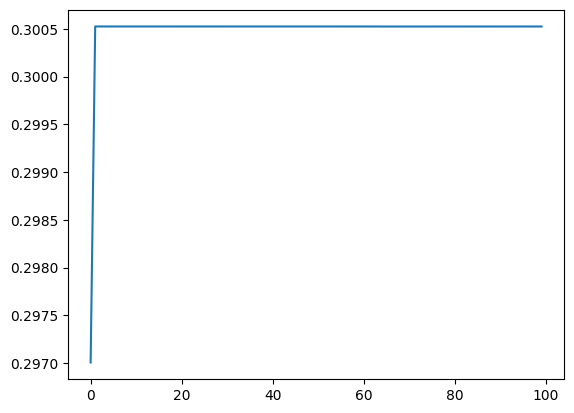

In [75]:
plt.plot(la_mu_grad_norms, label='la mu grads')

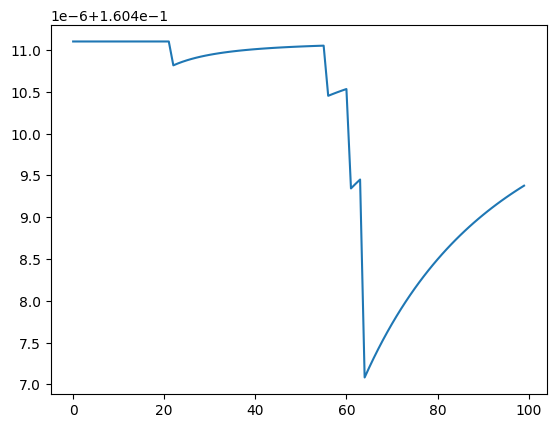

In [76]:
plt.plot(t_grad_norms, label='t grad')